# Week 1 Assignment: Data cleaning and exploratory data analysis #
#### This assignment is to explore the average steps per participant, and look at their relationship from the perspective of City, Age and Gender ####


Here I will use the data from ***activity trackers***, the company which track people's activity via smartphone, smartwatch, wrist band or a clip-on device.


In [41]:
import seaborn as sns  
import pandas as pd 
import matplotlib.pyplot as plt

In [42]:
df_step = pd.read_csv('steps.csv',sep = ';') #read steps csv file
#print(df_step.head())

In [43]:
df_survey = pd.read_csv('survey.csv') #read survey csv file
#print(df_survey.head())

In [44]:
df = pd.merge(df_step, df_survey, on = 'id') # merge dataframe
#print(df.head())

In [45]:
df['steps_mean'] = df.loc[:,"20-6-2013":"13-5-2014"].mean(axis=1, skipna = True).round(1) #calculate mean of steps
df = df[['id','city','gender','age','hh_size','education','education_1','height','weight','steps_mean']] #select columns
df['steps_mean'] = df['steps_mean'].astype('float') #set up data type of mean as float
print(df.head())

   id         city  gender    age  hh_size  education          education_1  \
0   1     Bordeaux    Male  25-34        4          4  Master or doctorate   
1   2        Lille    Male  35-44        1          3             Bachelor   
2   3  Montpellier    Male  25-34        2          2  Master or doctorate   
3   4         Lyon    Male    <25        1          1             Bachelor   
4   5  Montpellier  Female  25-34        3          4             Bachelor   

   height  weight  steps_mean  
0   178.0    98.0     10205.5  
1   180.0    77.0      5687.4  
2   180.0    83.0      8301.7  
3   178.0    80.0      3633.2  
4   167.0    61.0      5312.1  


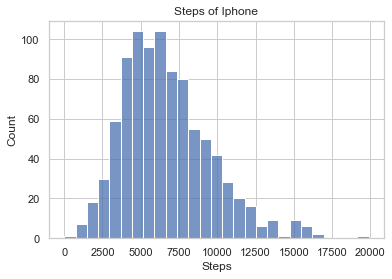

In [46]:
df = df[df['steps_mean'] < 20000] #choose steps_mean below 20000
df['steps_mean'].name = 'Steps' #Labeling the variable for plottin
all_steps = df['steps_mean'].dropna() #drop all the nah data
sns.histplot(all_steps, kde=False) #make a histplot
plt.title('Steps of Iphone') #create title
plt.show()

The mean Iphone Step is: 6671.515886833516 steps
The median Iphone Step is: 6237.5 steps


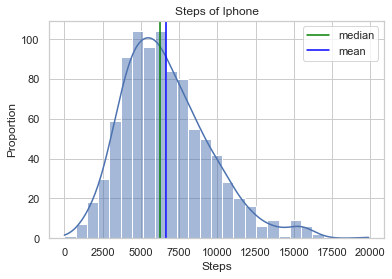

In [47]:
mean_step = df['steps_mean'].mean() #calculate the mean 
median_step = df['steps_mean'].median() #calculate the median

print(f'The mean Iphone Step is: {mean_step} steps' ) 
print(f'The median Iphone Step is: {median_step} steps' )

sns.histplot(all_steps, kde=True)
plt.title('Steps of Iphone')
plt.axvline(median_step, 0, 20000, color='green', label='median') #add a vertical line at x-position median_size, from x = 0 to x = 20000 
plt.axvline(mean_step, 0, 20000, color='blue', label='mean') #add a vertical line at x-position mean_size, from x = 0 to x = 20000 
plt.xlabel('Steps')
plt.ylabel('Proportion')
plt.legend() 
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


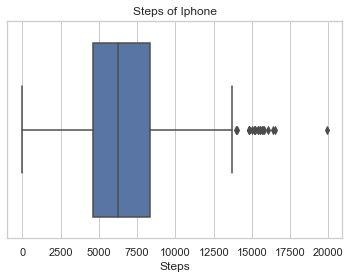

In [48]:
sns.boxplot(df['steps_mean']) #make a boxplot with the same data
plt.title('Steps of Iphone')
plt.xlabel('Steps')
plt.show()

Here I am interested if there is a significant difference in the number of steps due to the different age and gender.

As it can be seen in the violin plot, eople younger than 25 walk fewer steps. The number of samples between 55-64 is the, and the number of steps is also the most. 

From the gender perspective, there's no such big significant. However, there are only male data for people over 65. We cannot say that only males use pedometers in this age group, or there may be missing data.

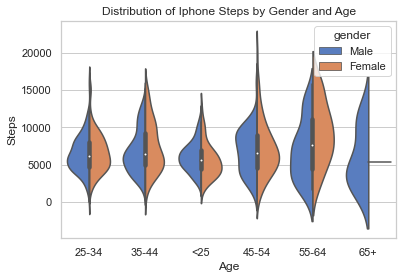

In [49]:
sns.set_theme(style="whitegrid")
sns.violinplot(x="age", y="steps_mean", hue="gender",data=df, palette="muted", split=True)
plt.title('Distribution of Iphone Steps by Gender and Age')
plt.xlabel('Age')
plt.ylabel('Steps')
plt.show()

Here I use value counts to see how many citys they have in the dataframe

In [50]:
pd.value_counts(df["city"])

Lille          499
Montpellier    153
Lyon           142
Bordeaux       125
Name: city, dtype: int64

I was curious if there's any relationship between age and city, so I make a crosstab of this two variables in order to make it more clearly.

In [51]:
pd.crosstab(df["age"], df["city"])

city,Bordeaux,Lille,Lyon,Montpellier
age,,,,
25-34,52,236,64,72
35-44,20,92,33,31
45-54,21,81,17,25
55-64,8,25,5,7
65+,4,3,0,0
<25,20,62,23,18


It's hard to compare the different categories using absolute numbers. So i use normalized data (in proportions)

In [52]:
pd.crosstab(df["city"],df["age"], normalize="columns")

age,25-34,35-44,45-54,55-64,65+,<25
city,,,,,,
Bordeaux,0.122642,0.113636,0.145833,0.177778,0.571429,0.162602
Lille,0.556604,0.522727,0.562500,0.555556,0.428571,0.504065
Lyon,0.150943,0.187500,0.118056,0.111111,0.000000,0.186992
Montpellier,0.169811,0.176136,0.173611,0.155556,0.000000,0.146341


Through the bar plot, it shows in the samples most of people are from *Lille*, and age is 25-34 in between.

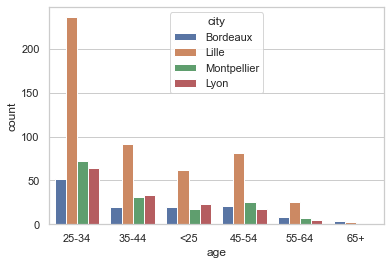

In [53]:
sns.countplot(x="age", hue="city", data=df)
plt.show()